Car Prediction

In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('CarData.csv')

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
df.size

34720

In [5]:
df.shape

(4340, 8)

In [6]:
print(df['seller_type'].unique())
print(df['owner'].unique())
print(df['transmission'].unique())

['Individual' 'Dealer' 'Trustmark Dealer']
['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']
['Manual' 'Automatic']


In [7]:
#checking null values
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [8]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [9]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [10]:
final_dataset=df[["year","selling_price","km_driven","fuel","seller_type","transmission"]]


In [11]:
final_dataset.head()

,year,selling_price,km_driven,fuel,seller_type,transmission
0,2007,60000,70000,Petrol,Individual,Manual
1,2007,135000,50000,Petrol,Individual,Manual
2,2012,600000,100000,Diesel,Individual,Manual
3,2017,250000,46000,Petrol,Individual,Manual
4,2014,450000,141000,Diesel,Individual,Manual


In [29]:
#final_dataset['current_year']=2022

In [15]:
final_dataset.loc[final_dataset.current_year]=2022

In [16]:
final_dataset.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,current_year
0,2007,60000,70000,Petrol,Individual,Manual,2022
1,2007,135000,50000,Petrol,Individual,Manual,2022
2,2012,600000,100000,Diesel,Individual,Manual,2022
3,2017,250000,46000,Petrol,Individual,Manual,2022
4,2014,450000,141000,Diesel,Individual,Manual,2022


In [17]:
final_dataset['no_year']=final_dataset['current_year']-final_dataset['year']

In [18]:
final_dataset.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,current_year,no_year
0,2007,60000,70000,Petrol,Individual,Manual,2022,15
1,2007,135000,50000,Petrol,Individual,Manual,2022,15
2,2012,600000,100000,Diesel,Individual,Manual,2022,10
3,2017,250000,46000,Petrol,Individual,Manual,2022,5
4,2014,450000,141000,Diesel,Individual,Manual,2022,8


In [19]:
final_dataset.drop(['year'],axis=1,inplace=True)

In [20]:
final_dataset.drop(['current_year'],axis=1,inplace=True)#inplace=true to permanently change it

In [21]:
final_dataset.head()

,selling_price,km_driven,fuel,seller_type,transmission,no_year
0,60000,70000,Petrol,Individual,Manual,15
1,135000,50000,Petrol,Individual,Manual,15
2,600000,100000,Diesel,Individual,Manual,10
3,250000,46000,Petrol,Individual,Manual,5
4,450000,141000,Diesel,Individual,Manual,8


In [22]:
final_dataset=pd.get_dummies(final_dataset,drop_first=True)

In [23]:
final_dataset.head()

,selling_price,km_driven,no_year,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual
0,60000,70000,15,0,0,0,0,1,0,1,0,0,1
1,135000,50000,15,0,0,0,0,1,0,1,0,0,1
2,600000,100000,10,0,1,0,0,0,0,1,0,0,1
3,250000,46000,5,0,0,0,0,1,0,1,0,0,1
4,450000,141000,8,0,1,0,0,0,0,1,0,0,1


In [24]:
import seaborn as sns

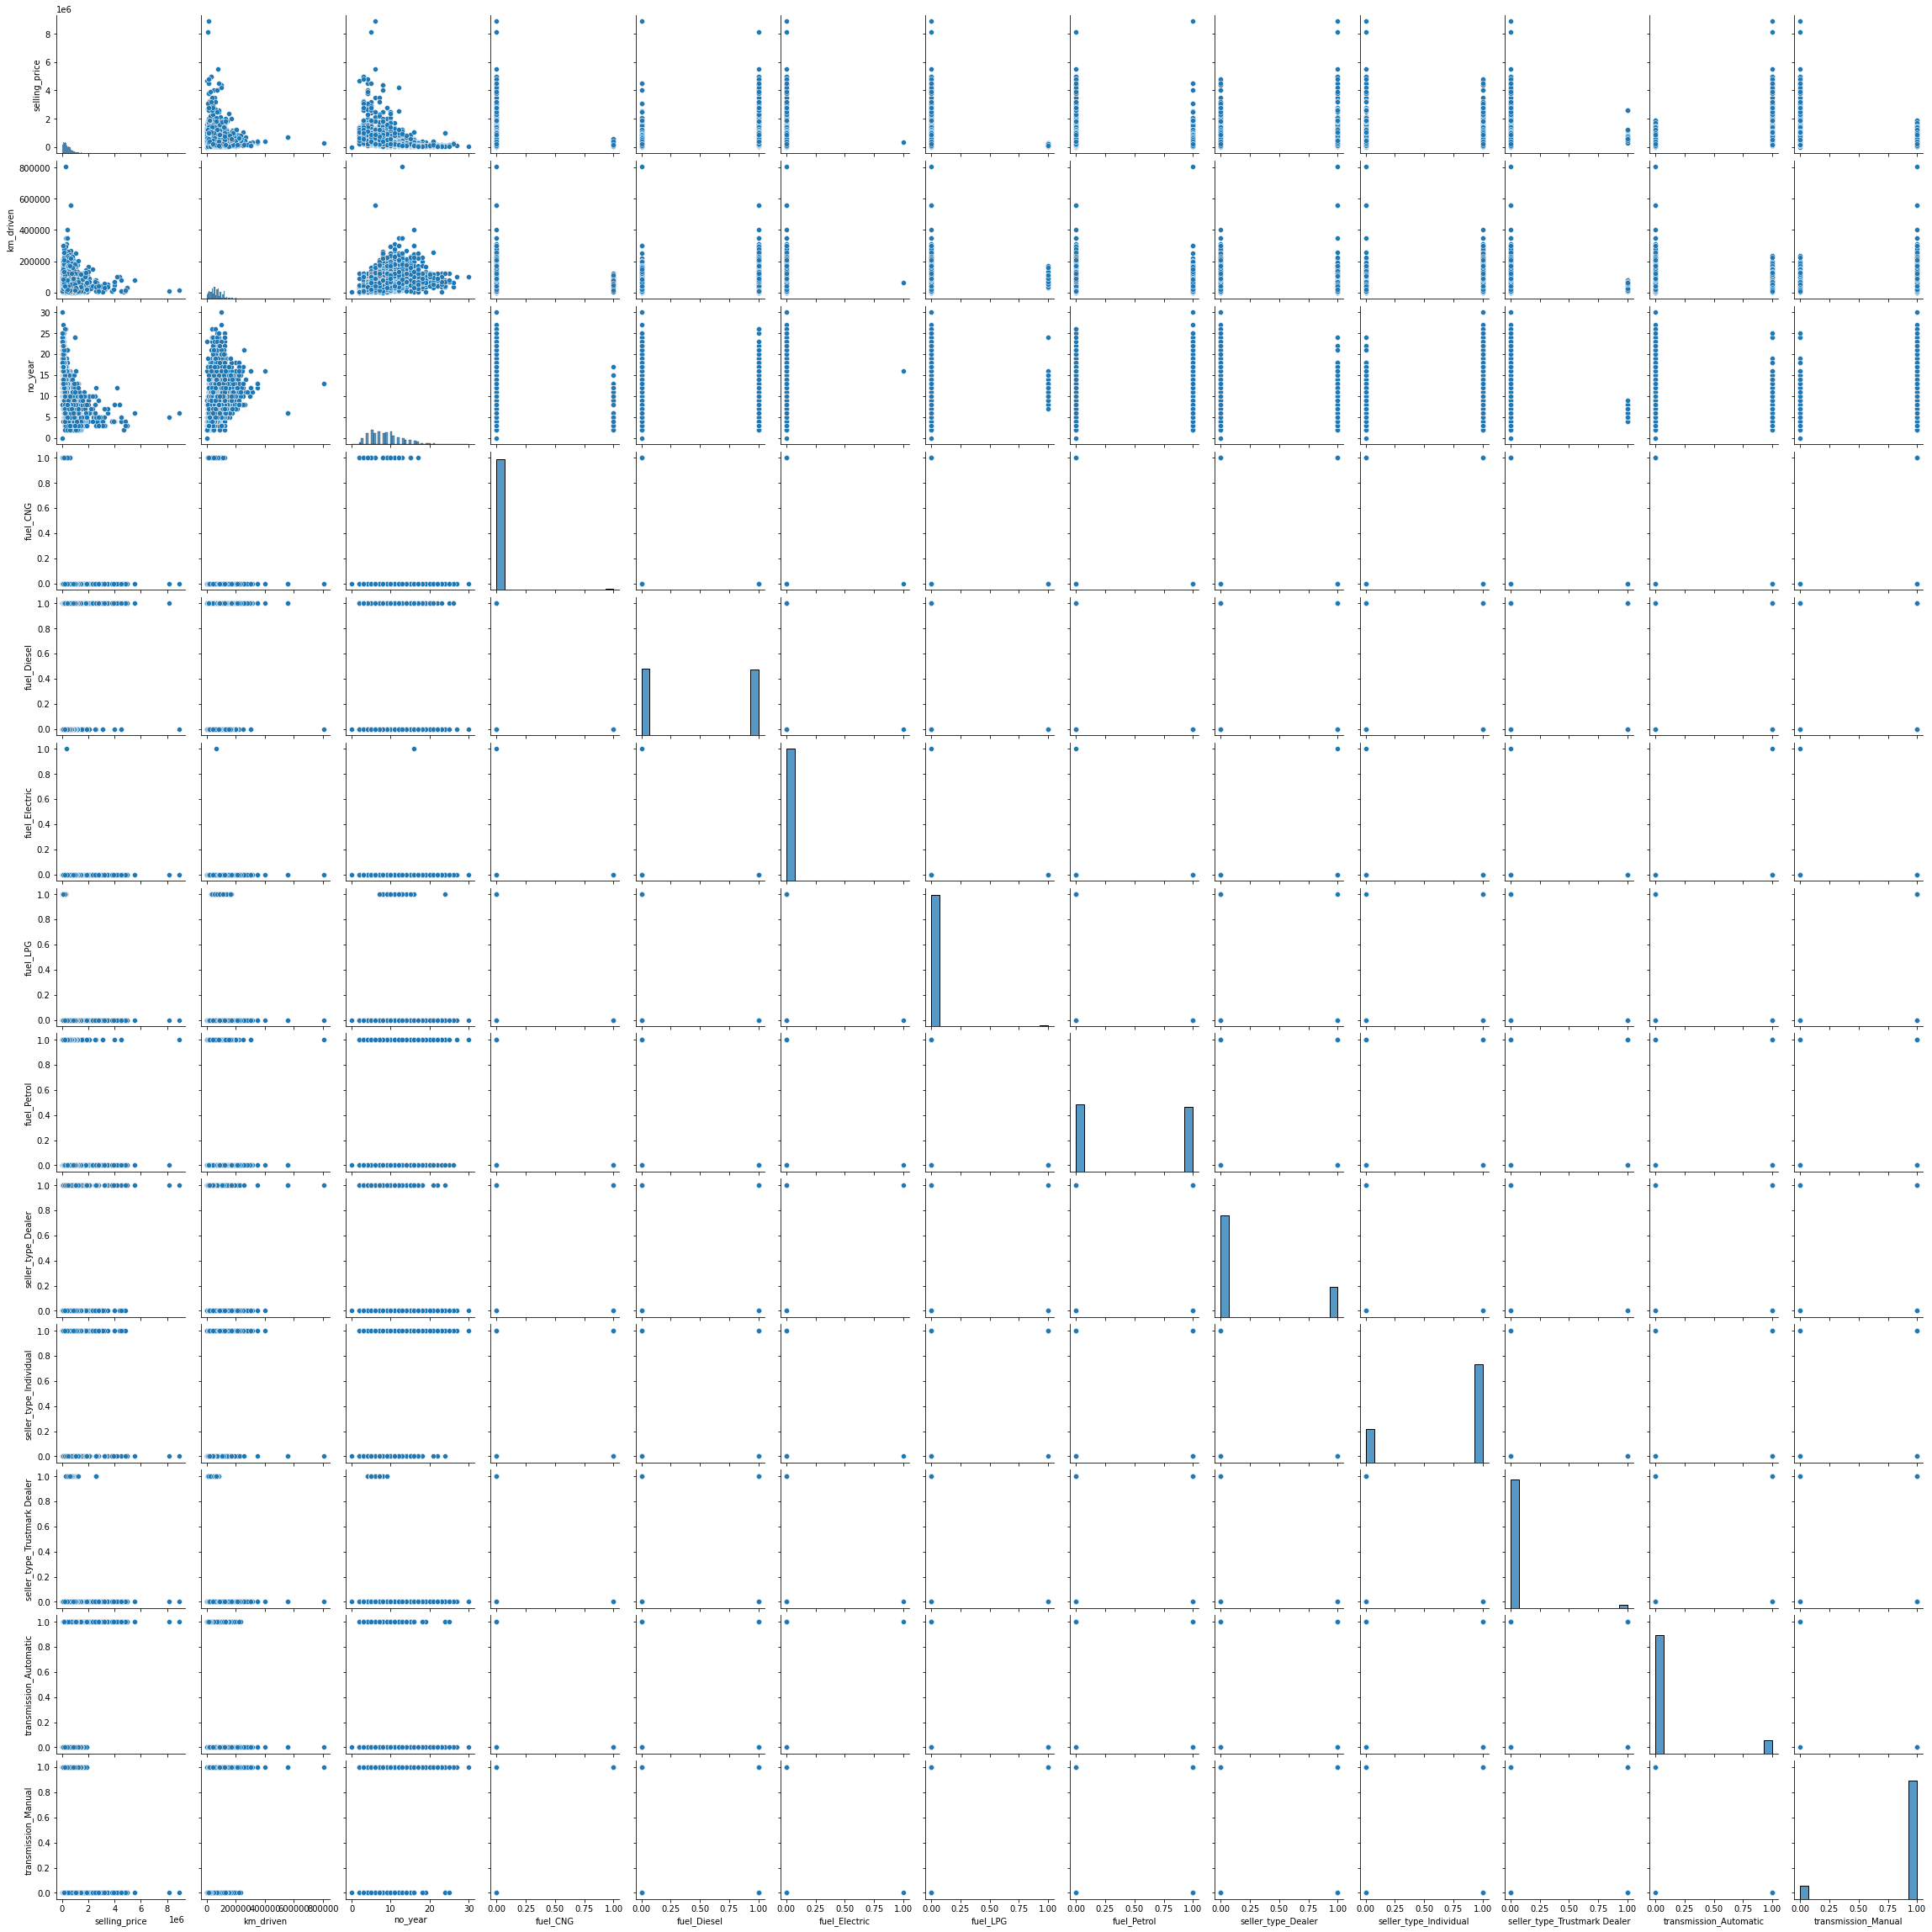

In [25]:
sns.pairplot(final_dataset)

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

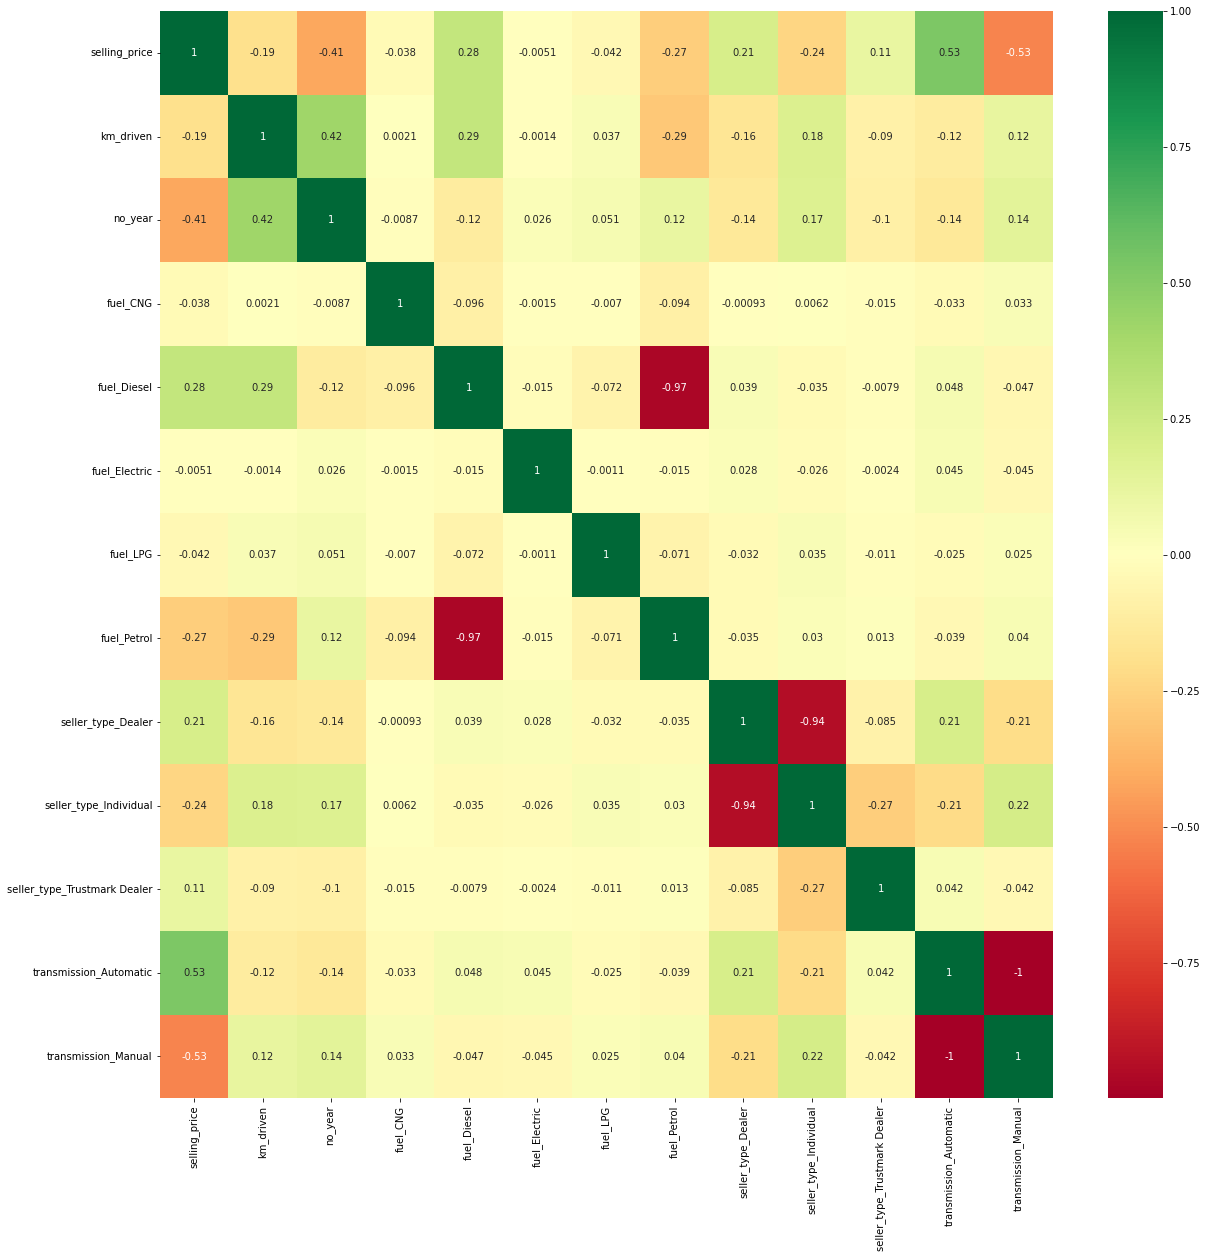

In [28]:
#co relational matrix
corrmat=final_dataset.corr()
#top co related features
top_corr_features=corrmat.index
#ploting heatmap
plt.figure(figsize=(20,20))
g=sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [30]:
final_dataset.head()

,selling_price,km_driven,no_year,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual
0,60000,70000,15,0,0,0,0,1,0,1,0,0,1
1,135000,50000,15,0,0,0,0,1,0,1,0,0,1
2,600000,100000,10,0,1,0,0,0,0,1,0,0,1
3,250000,46000,5,0,0,0,0,1,0,1,0,0,1
4,450000,141000,8,0,1,0,0,0,0,1,0,0,1


In [31]:
X=final_dataset.iloc[:,1:]#independant values
Y=final_dataset.iloc[:,0]#dependant values


In [32]:
X.head()

,km_driven,no_year,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual
0,70000,15,0,0,0,0,1,0,1,0,0,1
1,50000,15,0,0,0,0,1,0,1,0,0,1
2,100000,10,0,1,0,0,0,0,1,0,0,1
3,46000,5,0,0,0,0,1,0,1,0,0,1
4,141000,8,0,1,0,0,0,0,1,0,0,1


In [33]:
Y.head()

0     60000
1    135000
2    600000
3    250000
4    450000
Name: selling_price, dtype: int64

In [35]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,Y)

ExtraTreesRegressor()

In [36]:
print(model.feature_importances_)

[2.61609989e-01 2.59243851e-01 6.92637892e-05 1.31609650e-01
 2.16416542e-05 3.64504631e-05 1.41781068e-04 2.60588339e-02
 1.76953026e-02 7.28206435e-03 2.96115116e-01 1.16056105e-04]


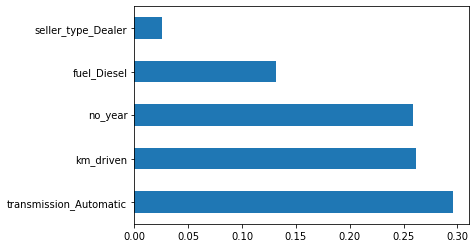

In [37]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()